# FASHION CLASS CLASSIFICATION 

- Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples.
- Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

- The 10 classes are as follows:  
    0 => T-shirt/top
    1 => Trouser
    2 => Pullover
    3 => Dress
    4 => Coat
    5 => Sandal
    6 => Shirt
    7 => Sneaker
    8 => Bag
    9 => Ankle boot

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
- Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher      numbers meaning darker. This pixel-value is an integer between 0 and 255. 

## Importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset train set and test set

In [2]:
dataset_train = pd.read_csv('F:\\PROJECT\\3. Fashion Class Classification\\fashion-mnist_train.csv', sep = ',')

In [3]:
dataset_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset_test = pd.read_csv('F:\\PROJECT\\3. Fashion Class Classification\\fashion-mnist_test.csv', sep = ',')

In [5]:
dataset_train.shape

(60000, 785)

##### converting the dataset into array

In [6]:
train = np.array(dataset_train, dtype='float32')

In [7]:
test = np.array(dataset_test, dtype= 'float32')

#### visualise the dataset as image

8.0

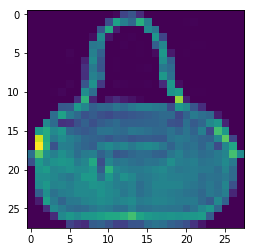

In [8]:
#we choose col = 1 because col= 0 is label of product
i = 20
plt.imshow(train[i, 1:].reshape(28, 28))
label = train[i, 0]
label

### Sample view of training set

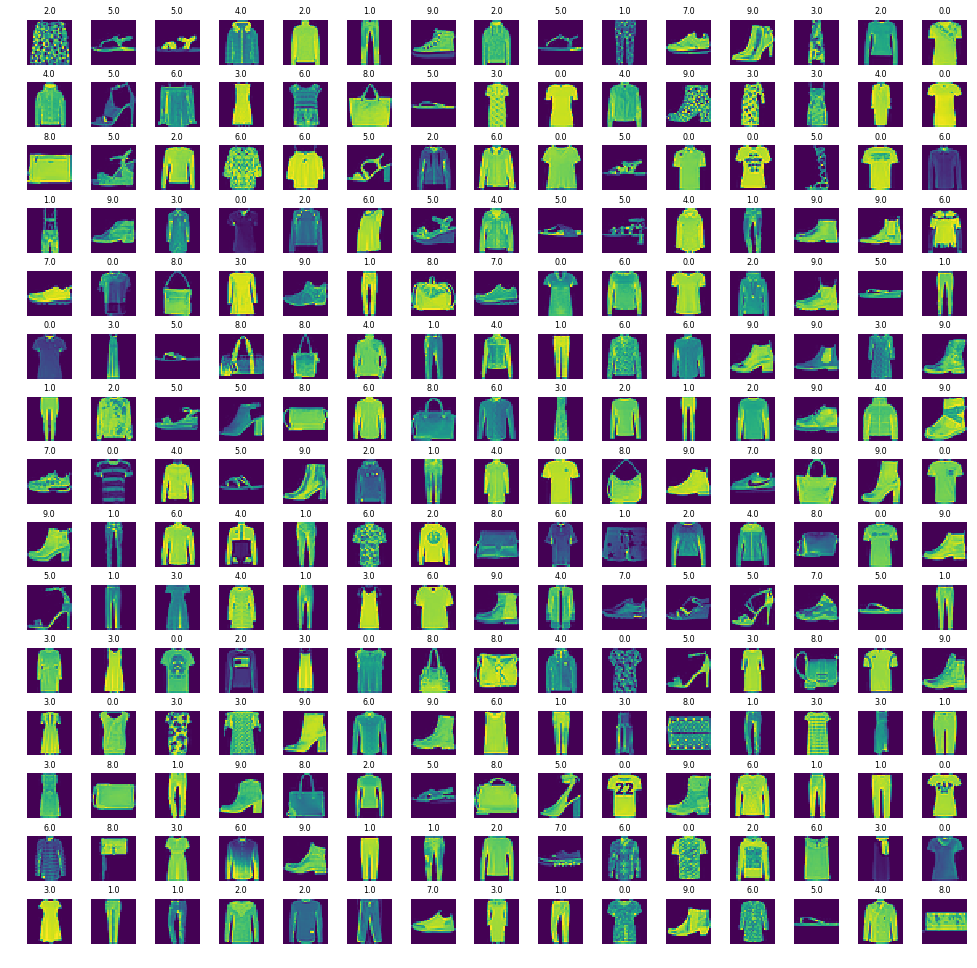

In [37]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    axes[i].set_title(train[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [9]:
#preparing the train set
X_train = train[:, 1:]/255
Y_train = train[:, 0]

In [10]:
#preparing the test set
X_test = test[:, 1:]/255
Y_test = test[:, 0]

### splitting the train set into train set and validaton set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 0)

In [12]:
X_train.shape , X_val.shape

((45000, 784), (15000, 784))

### Converting to 4 dimension array

In [13]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 1))

In [14]:
X_train.shape, X_test.shape, X_val.shape

((45000, 28, 28, 1), (10000, 28, 28, 1), (15000, 28, 28, 1))

### Importing the library for Neural Network

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import TensorBoard

C:\Users\SAMEER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
#initialise the NeuralNetwork
classifier = Sequential()

In [18]:
#Applying the convolution neural network
classifier.add(Conv2D(32,(3, 3), input_shape = (28, 28, 1), activation= 'relu'))

#Applyng the MaxPooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [19]:
#Adding Droupout to avoid Overfitting
classifier.add(Dropout(0.25))

In [21]:
#Applying the Flatten
classifier.add(Flatten())

In [22]:
#Adding the second layer
classifier.add(Dense(units=32, activation='relu'))

#Adding the output layers
classifier.add(Dense(units= 10, activation= 'sigmoid'))

In [23]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                147488    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total para

In [24]:
classifier.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
classifier.fit(X_train, Y_train,
               batch_size = 512,
               epochs = 50,
               verbose = 1,
               validation_data = (X_val, Y_val)
              )

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 238s 5ms/step - loss: 0.5022 - acc: 0.8181 - val_loss: 0.4272 - val_acc: 0.8509
Epoch 2/50
45000/45000 [==============================] - 240s 5ms/step - loss: 0.4173 - acc: 0.8523 - val_loss: 0.3808 - val_acc: 0.8689
Epoch 3/50
45000/45000 [==============================] - 239s 5ms/step - loss: 0.3736 - acc: 0.8675 - val_loss: 0.3439 - val_acc: 0.8807
Epoch 4/50
45000/45000 [==============================] - 238s 5ms/step - loss: 0.3463 - acc: 0.8766 - val_loss: 0.3294 - val_acc: 0.8863
Epoch 5/50
45000/45000 [==============================] - 241s 5ms/step - loss: 0.3260 - acc: 0.8836 - val_loss: 0.3115 - val_acc: 0.8935
Epoch 6/50
45000/45000 [==============================] - 238s 5ms/step - loss: 0.3152 - acc: 0.8880 - val_loss: 0.3045 - val_acc: 0.8940
Epoch 7/50
45000/45000 [==============================] - 238s 5ms/step - loss: 0.2958 - acc: 0.8958 - val_loss: 0.3015 - 

#### Evaluating the model

In [28]:
ev_model = classifier.evaluate(X_test, Y_test)
print('Test Accuracy - {:.3f}'.format(ev_model[1]))

10000/10000 [==============================] - 21s 2ms/step
Test Accuracy - 0.926


In [29]:
Y_pred = classifier.predict_classes(X_test)

In [30]:
Y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

### Analyse the predicted results

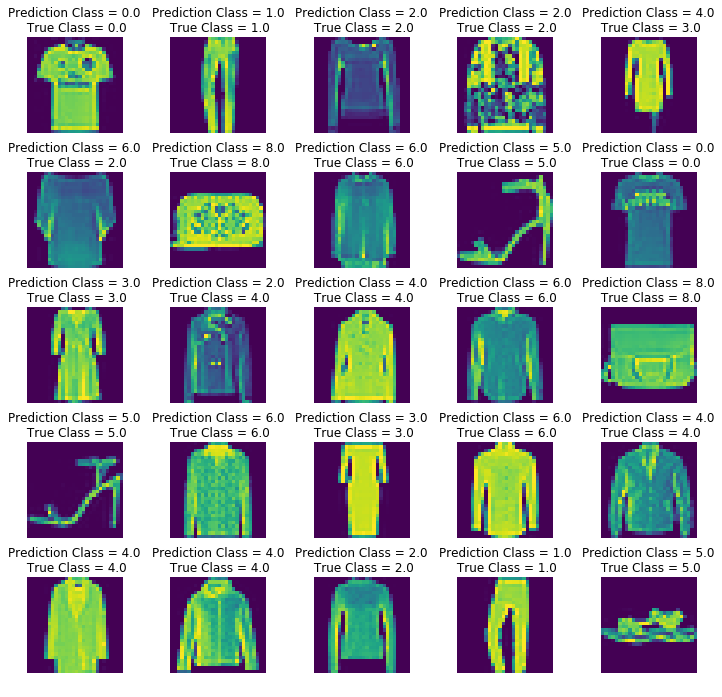

In [32]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(Y_pred[i], Y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

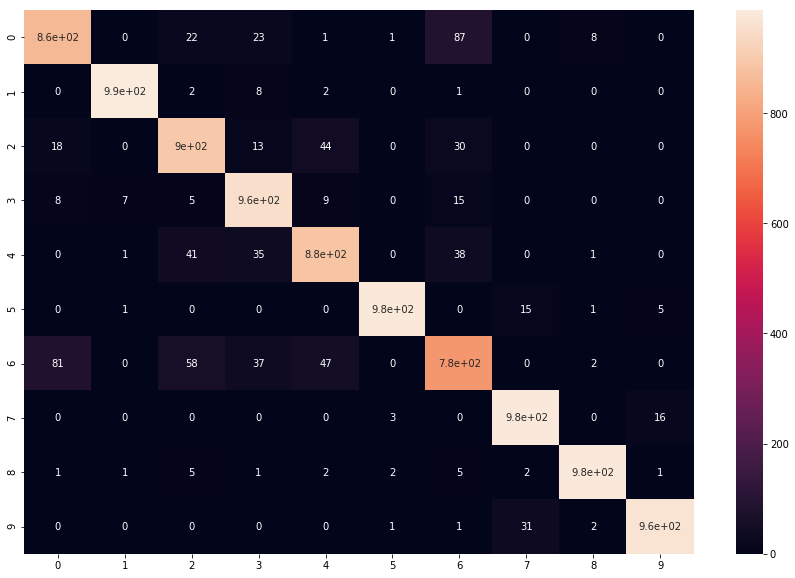

In [34]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (15,10))
sns.heatmap(cm, annot=True)

#### Viewing the model Report

In [35]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(Y_test,Y_pred, target_names = target_names))

             precision    recall  f1-score   support

    Class 0       0.89      0.86      0.87      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.87      0.90      0.88      1000
    Class 3       0.89      0.96      0.92      1000
    Class 4       0.89      0.88      0.89      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.81      0.78      0.79      1000
    Class 7       0.95      0.98      0.97      1000
    Class 8       0.99      0.98      0.98      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.93      0.93      0.93     10000



### Here we get the Accuracy of about 93% to the test set!!!!!!!!!!